#

In [1]:
# Add project root to Python path
import sys
import os
import logging
import platform
# import json
from datetime import date



# Get the absolute path to the project root directory
project_root = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))  # Adjust path as needed
# Add to path if not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")

#
from water_industry import WaterQualityWorkflow, WaterQualityState

print(f"  System: {sys.platform}")
print(f"  Platform: {platform.platform()}")
print(f"  Python version: {platform.python_version()}")
print(f"  System Execution (Python) path: {'/'.join(sys.executable.strip('/').split('/')[-3:])}")
print(f"  Last update: {date.today().strftime('%Y-%m-%d')}")

Added /Users/shervin/Documents/code/github_moderncan/agent-dev to Python path
  System: darwin
  Platform: macOS-15.5-arm64-arm-64bit
  Python version: 3.11.12
  System Execution (Python) path: .venv/bin/python
  Last update: 2025-05-20


In [2]:
# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [3]:
water_quality_workflow = WaterQualityWorkflow(debug_mode=True)

2025-05-20 12:24:35,953 - __main__ - INFO - Workflow visualization:


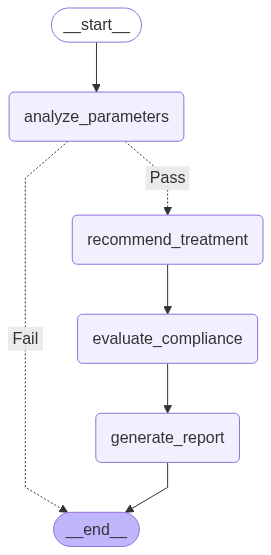

In [4]:
logger.info("Workflow visualization:")
water_quality_workflow.visualize()

In [5]:
# Example water quality parameters
sample_data = {
    "pH": 7.2,
    "turbidity": 1.8,  # NTU
    "total_dissolved_solids": 280,  # mg/L
    "dissolved_oxygen": 7.5,  # mg/L
    "temperature": 22.3,  # °C
    "chlorine": 0.7,  # mg/L
    "lead": 0.008,  # mg/L
    "nitrates": 3.2,  # mg/L
    "phosphates": 0.15,  # mg/L
    "total_coliform": 2,  # CFU/100mL
    "e_coli": 0,  # CFU/100mL
}

In [7]:
# Run the workflow
result = water_quality_workflow.run(sample_data, generate_chart=False)

# If the workflow stopped early, try again with bypass_quality_check
if 'final_report' not in result:
    print("\nRetrying with quality check bypass...\n")
    # Don't generate a chart on the first try, only on the retry
    result = water_quality_workflow.run(
        sample_data, bypass_quality_check=True, generate_chart=False)
else:
    # Only generate a chart if we succeeded on the first try
    if 'final_report' in result:
        try:
            chart = generate_report_chart(
                {k: v for k, v in sample_data.items()
                    if k in ['pH', 'turbidity', 'total_dissolved_solids', 'chlorine', 'dissolved_oxygen']},
                chart_type="bar",
                title="Key Water Quality Parameters"
            )
            display(chart)
            print("Chart generated for key parameters.")
        except Exception as e:
            print(f"Error generating chart: {e}")

# Print final report
if 'final_report' in result:
    print("\nWATER QUALITY FINAL REPORT:")
    print("===========================")
    print(result["final_report"])

    # Optionally save as PDF
    # uncomment to save PDF
    # water_quality_workflow.run(sample_data, bypass_quality_check=True, save_pdf=True)


2025-05-20 12:27:29,077 - httpx - INFO - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"


INITIAL ANALYSIS COMPLETED:
Character count: 2143
First 100 characters: Here's a detailed analysis of the water quality parameters provided:

1. pH Analysis (7.2):
- The pH...

QUALITY CHECK RESULTS:
Topics found (4/4): pH, turbidity, dissolved solids, contaminant
Length check: 2143 characters (minimum: 200)
Topics check: 4 topics (minimum: 3)
Overall result: Pass


2025-05-20 12:27:40,648 - httpx - INFO - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
2025-05-20 12:27:49,864 - httpx - INFO - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
2025-05-20 12:28:03,207 - httpx - INFO - HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"



WORKFLOW COMPLETED
State keys: ['sample_data', 'initial_analysis', 'treatment_recommendations', 'compliance_evaluation', 'final_report']
Error generating chart: name 'generate_report_chart' is not defined

WATER QUALITY FINAL REPORT:
COMPREHENSIVE WATER QUALITY REPORT

EXECUTIVE SUMMARY:
Based on the analyzed parameters, the water quality is generally good and meets most regulatory requirements. The sample shows appropriate pH levels, acceptable turbidity, and good dissolved oxygen content. While most parameters are within compliance, there are minor concerns regarding trace coliform presence and detectable lead levels that require ongoing monitoring.

DETAILED FINDINGS:

Physical Parameters:
• pH: 7.2 - Optimal range
• Turbidity: 1.8 NTU - Meets standards
• Temperature: 22.3°C - Acceptable
• TDS: 280 mg/L - Well within limits

Chemical Parameters:
• Dissolved Oxygen: 7.5 mg/L - Excellent
• Chlorine: 0.7 mg/L - Appropriate
• Lead: 0.008 mg/L - Below action level
• Nitrates: 3.2 mg/L -